# Basemap

Basemap is a library to create maps using Python. This library provides many map projections and the methods to create data visualizations come from Matplotlib. 

It is important to mention that Basemap is under new management and the Cartopy project will replace Basemap in a future. The following examples aim at showing you other options.

To install Basemap, check at [Installation](https://matplotlib.org/basemap/users/installing.html).

## Importing Basemap

To import Basemap we do it from `mpl_toolkits.basemap`:

In [2]:
from mpl_toolkits.basemap import Basemap

## Basic map generation

Let's start with the simplest way of creating a map:

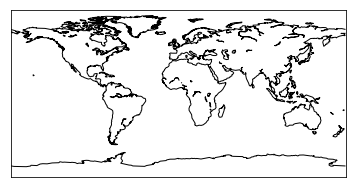

In [3]:
import matplotlib.pyplot as plt # We also include matplotlib to use the methods in it

m = Basemap() # This line creates the map. When no option is given we get the Plate Carrée projection centered at 0,0
m.drawcoastlines() #Coast lines 
plt.show() #To visualize the figure

### Projections

In Basemap we can define the projection of our map with the `projection` argument inside `Basemap`. The projections available are listed at [Basemap projections](https://matplotlib.org/basemap/users/mapsetup.html). Let's try the `Sinusoidal` projection, a global equal-area projection where the length of the parallels equals the cosine of the latitude.

/usr/lib/python3/dist-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


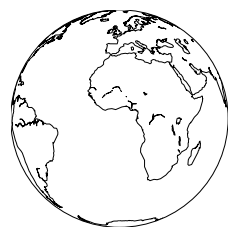

In [115]:
m = Basemap(projection='ortho', lat_0=0, lon_0=0)
m.drawcoastlines()

plt.show()

Now let's go for a map of a certain region. To enclose a specific area we can define the borders with the coordinates.

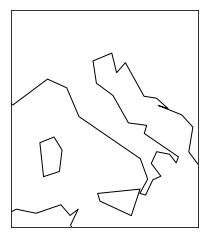

In [116]:
lon_min = 6
lon_max = 20
lat_min = 36
lat_max = 48

m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=42, lon_0=13)
m.drawcoastlines()
plt.show()

The map doesn't look so good, right? To fix this resolution problems, we can use the `resolution` argument. The default is crude (`c`), and this can be changed to low (`l`), intermediate (`i`), high (`h`) and full (`f`).

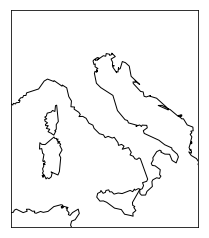

In [6]:
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=42, lon_0=13, resolution='l')
m.drawcoastlines()
plt.show()

You can also try by yourself to test the other resolution options by editing the `resolution` parameter, although it can take some time.

What about adding some color? We can use `fillcontinents` to define the color of continents:

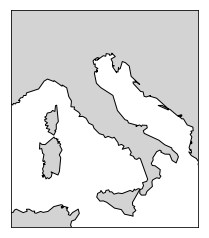

In [11]:
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=42, lon_0=13, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='lightgray')

plt.show()

## Features

To customize the map appearance we can add some more features. 

* **Countries**: National borders are drawn with `drawcountries()`.

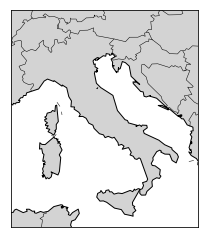

In [12]:
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=42, lon_0=13, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='lightgray')
m.drawcountries()
plt.show()

* **Rivers**: Rivers are added in a similar way as national borders, but here we use `drawrivers()`.

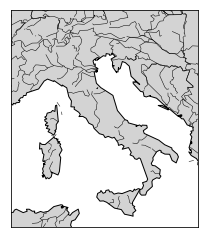

In [13]:
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=42, lon_0=13, resolution='l')
m.drawcoastlines()
m.fillcontinents(color='lightgray')
m.drawcountries()
m.drawrivers()
plt.show()

* **Topography**: To visualize topographical features on a map we have some options that can be easily added to Basemap. There are several images available to plot as a map background. These images are loaded with the options:

  - `drawlsmask()`: it draws a high-resolution land-sea mask as an image.
  - `bluemarble()` it draws a NASA blue marble image.
  - `shadedrelief()`: it draws a shaded relief image.
  - `etopo()`: it draws an etopo relief image from NOAA.
  - `warpimage()`: it uses an arbitrary image.

The detailed documentation on this can be found at [Map Backgrounds](https://matplotlib.org/basemap/users/geography.html). As an example, let's use `etopo()` to add some relief on our map:

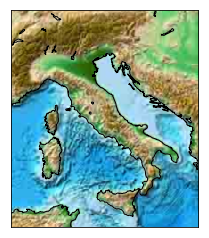

In [11]:
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=13, lon_0=42, resolution='i')
m.drawcoastlines()
m.etopo()
plt.show()

As you can observe, the resolution of etopo is not so good in this case, but can be worth to use it for bigger maps.

<div class="alert alert-success">
    <strong>Task:</strong> define a bigger region (a whole continent maybe) and reproduce a similar map using etopo to check the differences in the resolution.

## Symbols and labels

To add symbols and labels we can use the matplotlib methods:

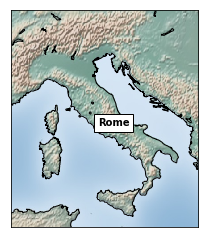

In [118]:
rome_lat = 41.90
rome_lon = 12.49

m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=13, lon_0=42, resolution='i')
m.drawcoastlines()
m.shadedrelief()

x, y = m(rome_lon,rome_lat) #This uses the Basemap instance (m) to include the position in the map coordinates
plt.text(x, y, 'Rome', fontsize=10, fontweight='bold', color='k',bbox=dict(facecolor='w')) # To plot the label
m.plot(x,y,marker='D', color='k')  #To plot the symbol
plt.show()

If we have more than one point to plot, then it is recommendable to use `scatter`. Let's say that we have a list of several stations to be plotted along this map. We would do:

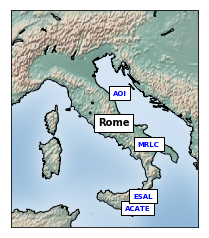

In [127]:
rome_lat = 41.90
rome_lon = 12.49

m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=13, lon_0=42, resolution='i')
m.drawcoastlines()
m.shadedrelief()

x, y = m(rome_lon,rome_lat) #This uses the Basemap instance (m) to include the position in the map coordinates
plt.text(x, y, 'Rome', fontsize=10, fontweight='bold', color='k',bbox=dict(facecolor='w'))
m.plot(x,y,marker='D', color='k')

st_lons = [14.50064, 13.602, 15.1345, 15.48892]
st_lats = [37.02398, 43.55017, 37.7551, 40.7564]
stations = ['ACATE', 'AOI', 'ESAL', 'MRLC']

x, y = m(st_lons, st_lats)
m.scatter(x,y, marker='^', color='b')
for i in range(len(stations)):
    plt.text(x[i],y[i],stations[i], fontsize=7, fontweight='bold', color='b',bbox=dict(facecolor='w'))

plt.show()

## Contoured data

Contoured data can also be added on Basemap using `contour` (for contours only) or `contourf` (for color filled contours). 

* We will create a numpy array containing longitude (`coord[:,0]`) and latitude (`coord[:,1]`) points.
* We will create a random data set grid (15x15) of integers in the range of 0 and 10, which will be called slip.
* With `numpy.meshgrid` we can create a grid of coordinates so it has the same dimensions as our slip grid.
* Now we can use the contour functions to add this data into our map. 


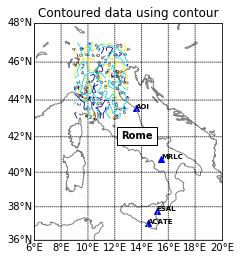

In [134]:
import numpy as np

rome_lat = 41.90
rome_lon = 12.49

# Coordinates and slip data creation.
coord=np.zeros((15,2))
coord[:,0] = np.linspace(9,13,15)
coord[:,1] = np.linspace(43,47,15)
slip = np.random.randint(0, 10, (15,15))

m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=13, lon_0=42, resolution='i')
m.drawcoastlines(color='gray')
m.drawmeridians(np.arange(0,360,2),labels=[0,0,0,1])
m.drawparallels(np.arange(-90,90,2),labels=[1,0,0,0])

x, y = m(rome_lon,rome_lat)
plt.text(x, y, 'Rome', fontsize=10, fontweight='bold', color='k',bbox=dict(facecolor='w'))
m.plot(x,y,marker='D', color='k')

st_lons = [14.50064, 13.602, 15.1345, 15.48892]
st_lats = [37.02398, 43.55017, 37.7551, 40.7564]
stations = ['ACATE', 'AOI', 'ESAL', 'MRLC']

x, y = m(st_lons, st_lats)
m.scatter(x,y, marker='^', color='b')
for i in range(len(stations)):
    plt.text(x[i],y[i],stations[i], fontsize=7, fontweight='bold', color='k')#,bbox=dict(facecolor='w'))
    
xx, yy = np.meshgrid(coord[:,0],coord[:,1])
level=np.linspace(0,10,6)
c=m.contour(xx, yy, slip, levels=level, linewidths=0.8, cmap = plt.cm.jet,
          zorder=15, latlon=True)

#The following line just add labels to the contour lines guided by `levels`
plt.clabel(c, inline=True, fmt='%1.0f', fontsize=5, colors='k')
plt.title('Contoured data using contour')
plt.savefig('images/basemap_contour.png', dpi=200)
plt.show()

It looks a bit messy because of the random data. Let's see what happens if instead of `contour` we use `contourf`:

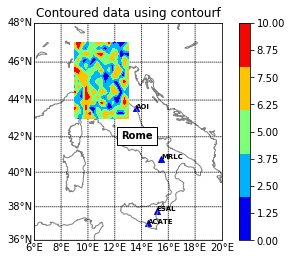

In [133]:
m = Basemap(projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max, 
            lat_0=13, lon_0=42, resolution='i')
m.drawcoastlines(color='gray')
m.drawmeridians(np.arange(0,360,2),labels=[0,0,0,1])
m.drawparallels(np.arange(-90,90,2),labels=[1,0,0,0])
#m.shadedrelief()

x, y = m(rome_lon,rome_lat) #This uses the Basemap instance (m) to include the position in the map coordinates
plt.text(x, y, 'Rome', fontsize=10, fontweight='bold', color='k',bbox=dict(facecolor='w'))
m.plot(x,y,marker='D', color='k')

st_lons = [14.50064, 13.602, 15.1345, 15.48892]
st_lats = [37.02398, 43.55017, 37.7551, 40.7564]
stations = ['ACATE', 'AOI', 'ESAL', 'MRLC']

x, y = m(st_lons, st_lats)
m.scatter(x,y, marker='^', color='b')
for i in range(len(stations)):
    plt.text(x[i],y[i],stations[i], fontsize=7, fontweight='bold', color='k')#,bbox=dict(facecolor='w'))
    
xx, yy = np.meshgrid(coord[:,0],coord[:,1])
level=np.linspace(0,10,6)
c=m.contourf(xx, yy, slip, levels=level, cmap = plt.cm.jet,
          zorder=15, latlon=True)

# The following two lines define ticks for a colorbar instead of labels as the previous case.
ticks=np.linspace(0,10,9)
plt.colorbar(c,ticks=ticks)
plt.title('Contoured data using contourf')
plt.savefig('images/basemap_contourf.png', dpi=200)
plt.show()